A solution to Supply & Demand with Equilibrium and Surplus in Python

I take a very plodding approach here, these aren't the cleverest algorithms, but hopefully the logic is decipherable.

Chuck Becker (becker@sonoma.edu), ECON 381 (Dr. Hanauer), Sonoma State University, Fall 2019

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Class definition below, based on:

Qd = b - aP

Qs = d + cP

This assumes & depends on the demand function having a negative coefficient (a),
and the supply function having a positive coefficient (c).

In [16]:
class Market:
    
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
        if b < d:
            raise ValueError('Insufficient demand!')
            
    def price(self):
        # Returns equilibrium price
        return ( (self.b - self.d) / (self.c - self.a) )
    
    def quantity(self):
        # Returns equilibrium quantity
        return ( abs(self.b) + ( self.a * self.price() ) )
    
    
    def consumer_surplus(self):
        #  assumed to always be a right triangle....
        Pe = self.price()
        Qe = self.quantity()
        Yd = abs(b/a)
        return ( ( Yd - Pe ) * Qe * (1/2) )
        
    
    def producer_surplus(self):
        # may be a right triangle or may be a quadrilateral
        # Y intercept Ys may be pos, zero, or minus
        Pe = self.price()
        Qe = self.quantity()
        
        Ys = -(self.d/self.c)
        
        ps = ( Pe - Ys )* Qe *(1/2)
         
        if self.d > 0:
            return (ps + ( (Ys * d) * (1/2) ) )
        else:
            return ps
        
        
        """if self.d > 0:
            Ys = -(self.d/self.c)   # this negative Ys adds a wrinkle to the logic
            quad = True
        elif self.d == 0:
            Ys = 0
            quad = False
        else:
            Ys = -(self.d/self.c)
            quad = False
            
        ps = ( Pe - Ys ) * Qe * (1/2)
        
        if quad:
            return  ( ps + ( (Ys * d) * (1/2) ) )  # remembering that Yd is negative!
        else:
            return ( ps )"""
    
    def demand_curve(self):
        return ( [ 0, self.b ], [ abs(self.b/self.a), 0 ]  )
    
    def supply_curve(self):
        sc_1 = []
        if d < 0:
            sc_1 = [0, abs(self.d/self.c)]
        elif d == 0:
            sc_1 = [0,0]
        else:
            sc_1 = [self.d, 0]
        return ( [ sc_1[0], self.b ], [ sc_1[1], (self.b-self.d)/self.c ] )
        
        

In [18]:
print("PLEASE NOTE: make sure to enter the sign with all coefficients and constants!  Please?")
a = float( input("Enter demand coefficient with sign: " ) )
b = float( input("Enter demand constant with sign: " ) )
c = float( input("Enter supply coefficient with sign: " ) )
d = float( input("Enter supply constant with sign: " ) )

if a > 0:
    raise ValueError('Demand coefficient must be negative ... the whole world depends on it!')

m = Market(a, b, c, d)

cs = m.consumer_surplus()
ps = m.producer_surplus()
dc = m.demand_curve()
sc = m.supply_curve()
ep = m.price()
eq = m.quantity()

PLEASE NOTE: make sure to enter the sign with all coefficients and constants!  Please?
Enter demand coefficient with sign: -3
Enter demand constant with sign: 25
Enter supply coefficient with sign: 3
Enter supply constant with sign: -5


Time to plot the results....

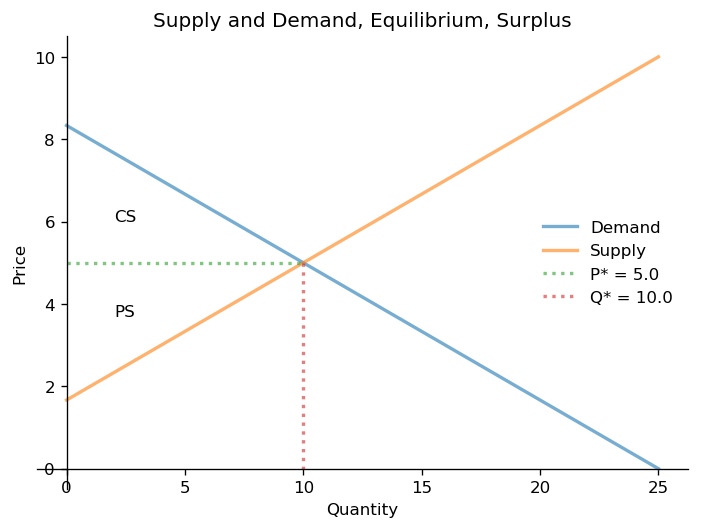

Equilibrium Price =  5.0
Equilibrium Quantity =  10.0
Consumer Surplus = 16.66666666666667
Producer Surplus = 16.666666666666664
Total Surplus = 33.333333333333336


In [19]:
#   Remember: Qd = b - aP       Qs = d + cP

fig, ax = plt.subplots(figsize=(7, 5), dpi=120)
ax = plt.gca()  # gca stands for 'get current axis', this was copied & pasted, no idea what it does....
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(dc[0], dc[1], linewidth=2, label='Demand', alpha=0.6 )
ax.plot(sc[0], sc[1], linewidth=2, label='Supply', alpha=0.6 )
plabel = "P* = " + str(ep)
qlabel = "Q* = " + str(eq)
ax.plot([0, eq], [ep, ep], linewidth=2, label=(plabel), alpha=0.6, linestyle=':')
ax.plot([eq, eq], [ep, 0], linewidth=2, label=(qlabel), alpha=0.6, linestyle=':')
plt.xlabel("Quantity")
plt.ylabel("Price")
ax.legend(loc='center right', frameon=False)
ax.set_title('Supply and Demand, Equilibrium, Surplus')
ax.annotate("CS", (eq/5, ep+1))
ax.annotate("PS", (eq/5, ep-1.3))
plt.show()

print("Equilibrium Price = ", str(ep))
print("Equilibrium Quantity = ", str(eq))
print('Consumer Surplus =', str( cs ) )
print('Producer Surplus =', str( ps ) )
print('Total Surplus =', str(cs+ps) )
